<a href="https://colab.research.google.com/github/Kitkat1021/NeuralStyleTransfer/blob/main/NeuralStyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Style Transfer is a process that uses NN to apply the artisitc style from one image to another

Style image - the one whose style you'll pick up and content image - 


Steps to cover 


*   downloading a model from Tensorflow Model Hub
*   Pre processing images for NNS
*   applying and visualizing NNS







In [ ]:
# installing all the required dependencies and libraries
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
# using hub.load model we are getting a pre trained model from Tensorflow Model Hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
# defing the function , expecting us to pass image path
def load_image(img_path):

    # use tf io helpers to read in our files
    img = tf.io.read_file(img_path)

    # making sure image has three channels
    img = tf.image.decode_image(img, channels=3)

    # setting the data type to float 32
    img = tf.image.convert_image_dtype(img, tf.float32)

    # making sure image is in new array
    img = img[tf.newaxis, :]

    # output the image 
    return img

In [ ]:
# loading both the images 
content_image = load_image('/content/Face_pic.jpeg')
style_image = load_image('/content/monet.jpeg')

In [ ]:
# shape of the image 
content_image.shape

TensorShape([1, 566, 659, 3])

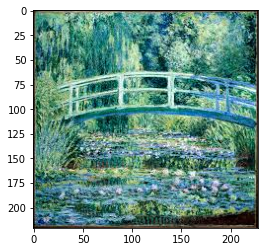

In [ ]:
# squeeze out our image and show it
plt.imshow(np.squeeze(style_image))
plt.show()

In [ ]:
# pass the image to the model and save the output
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

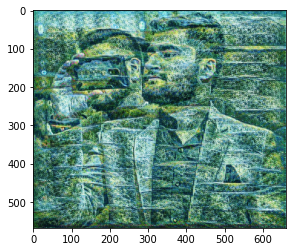

In [ ]:
# showing the stylized image
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
saving the generated image locally
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True